In [95]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Settings
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load Data

In [96]:
df = pd.read_csv('Walmart.csv')
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("First few rows:")
df.head()

original_df = df.copy(deep=True)

Dataset Overview:
Shape: (6435, 8)
Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
First few rows:


In [97]:
print("Data Types:")
print(df.dtypes)

print("Missing Values:")
print(df.isnull().sum())

Data Types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


# we can see that date is an object, we cant work with dates with that format

In [98]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.drop(columns=['Date'], inplace=True)

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


In [100]:
display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


In [101]:
#categorize numerical features and cotegorical features
nu = df[features].nunique().sort_values()
print(nu)



weekday            1
Holiday_Flag       2
year               3
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
dtype: int64


In [102]:
cf = ['weekday', 'month', 'year','Store','Holiday_Flag']
nf = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# EDA


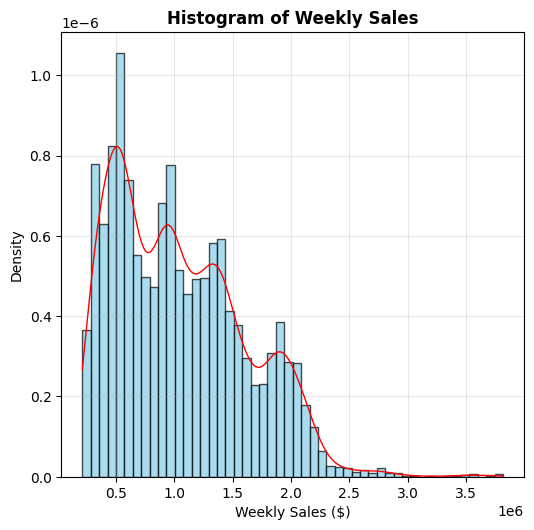

In [103]:
from scipy.stats import gaussian_kde

# Create a comprehensive view of Weekly_Sales distribution
plt.figure(figsize=(15, 10))

# 1. Histogram
plt.subplot(2, 3, 1)
plt.hist(df['Weekly_Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)

kde = gaussian_kde(df['Weekly_Sales'])
x = np.linspace(df['Weekly_Sales'].min(), df['Weekly_Sales'].max(), 200)
y_kde = kde(x)
plt.plot(x, y_kde, 'r-', linewidth=1)


plt.title('Histogram of Weekly Sales', fontweight='bold')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

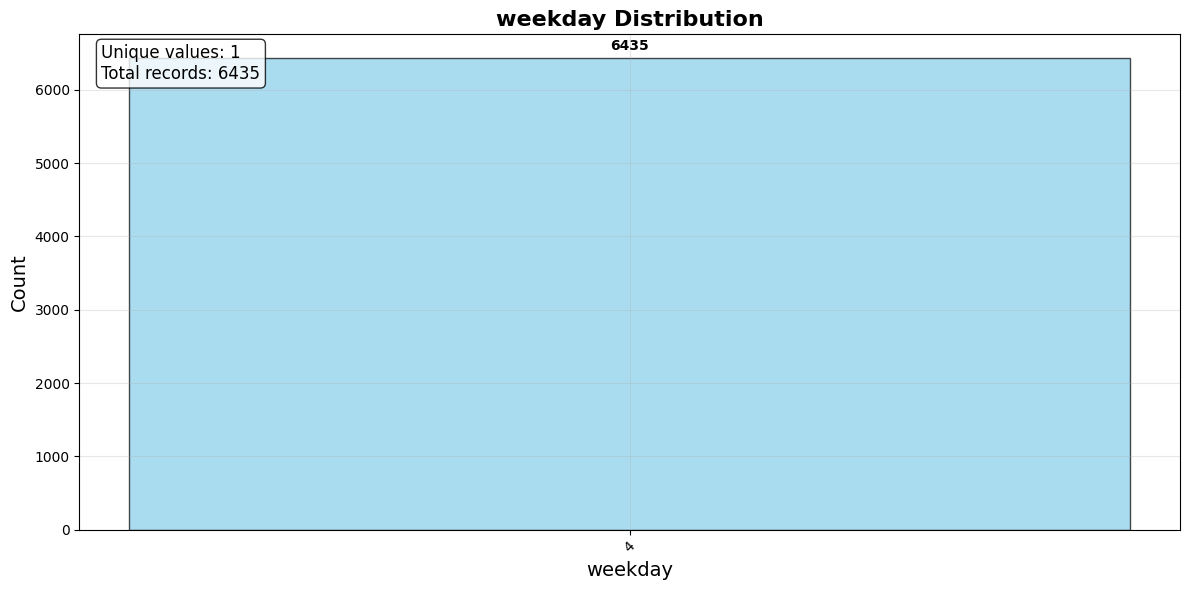

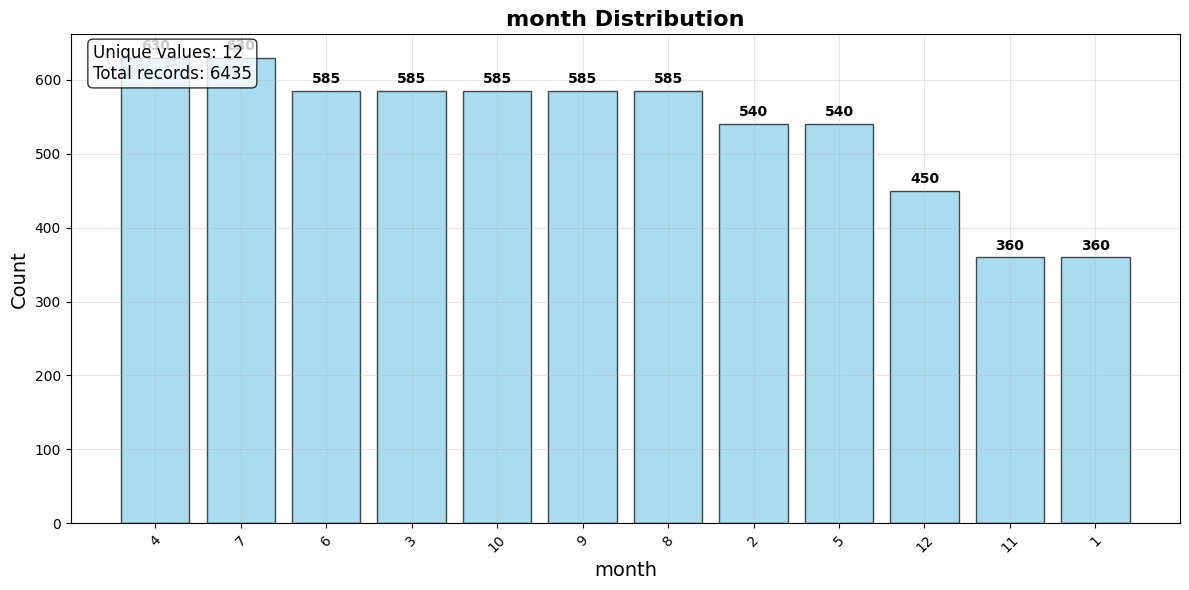

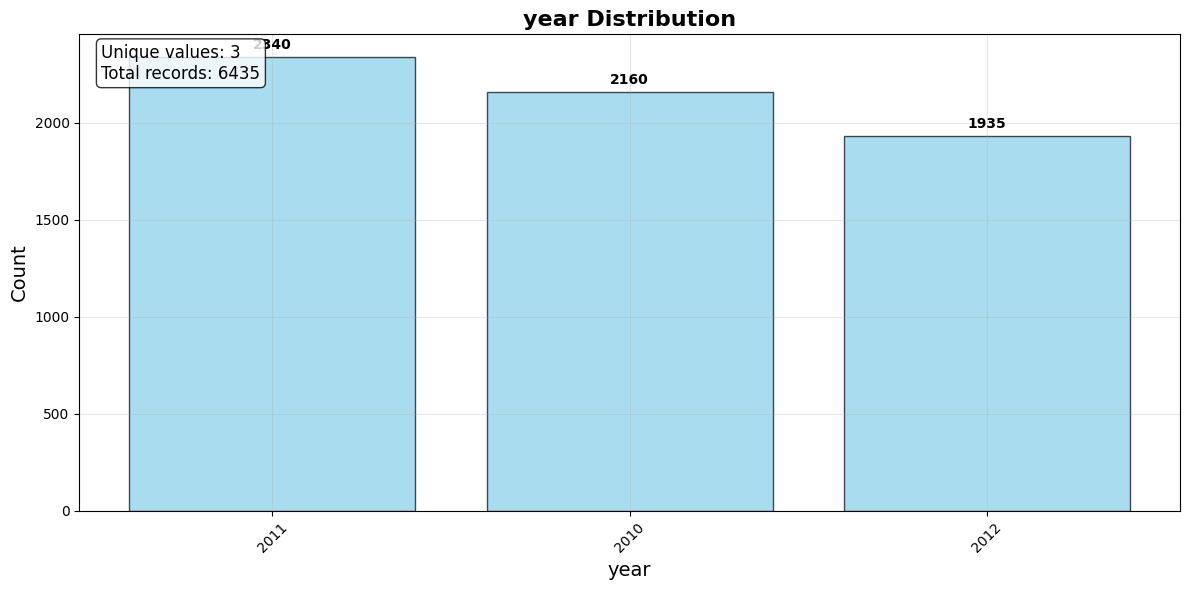

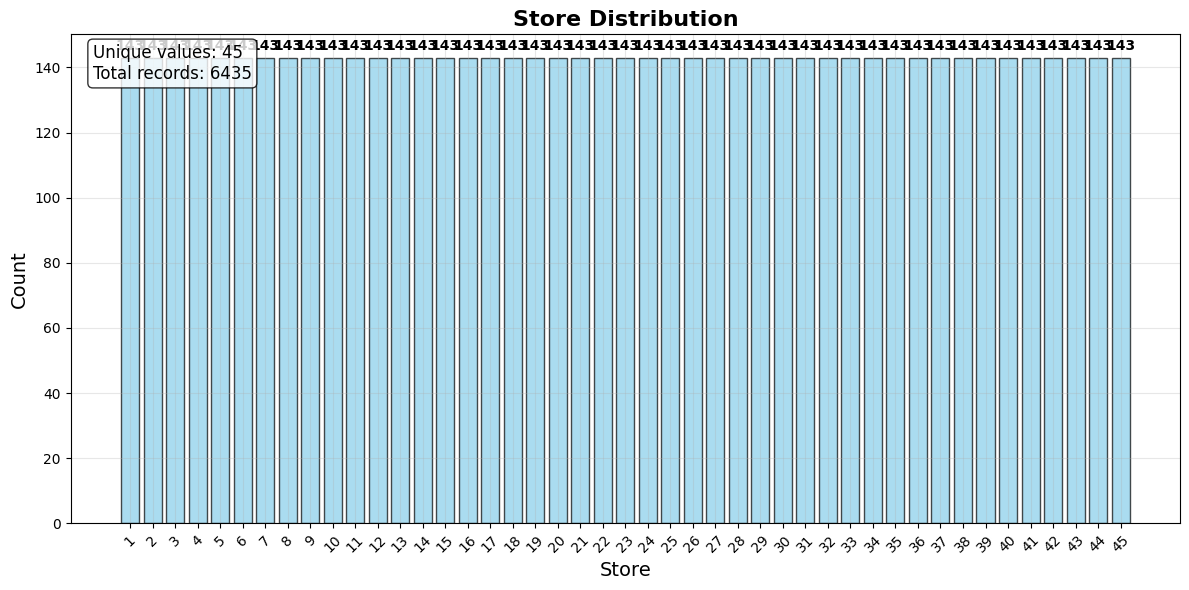

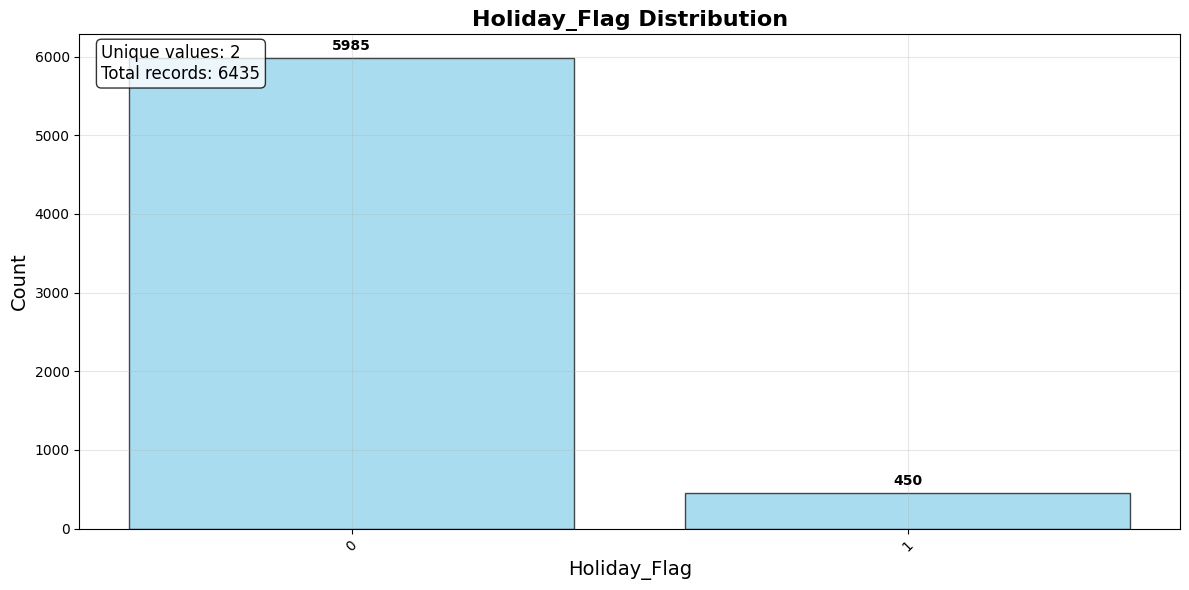

In [104]:
# Individual bar graphs for categorical features (without weekday)
for feature in cf:
    plt.figure(figsize=(12, 6))
    
    # Count values
    value_counts = df[feature].value_counts()
    
    # Create bar plot
    plt.bar(range(len(value_counts)), value_counts.values, color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'{feature} Distribution', fontweight='bold', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Add value labels on bars
    for j, v in enumerate(value_counts.values):
        plt.text(j, v + max(value_counts.values)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Add statistics
    plt.text(0.02, 0.98, f'Unique values: {len(value_counts)}\nTotal records: {len(df)}', 
            transform=plt.gca().transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

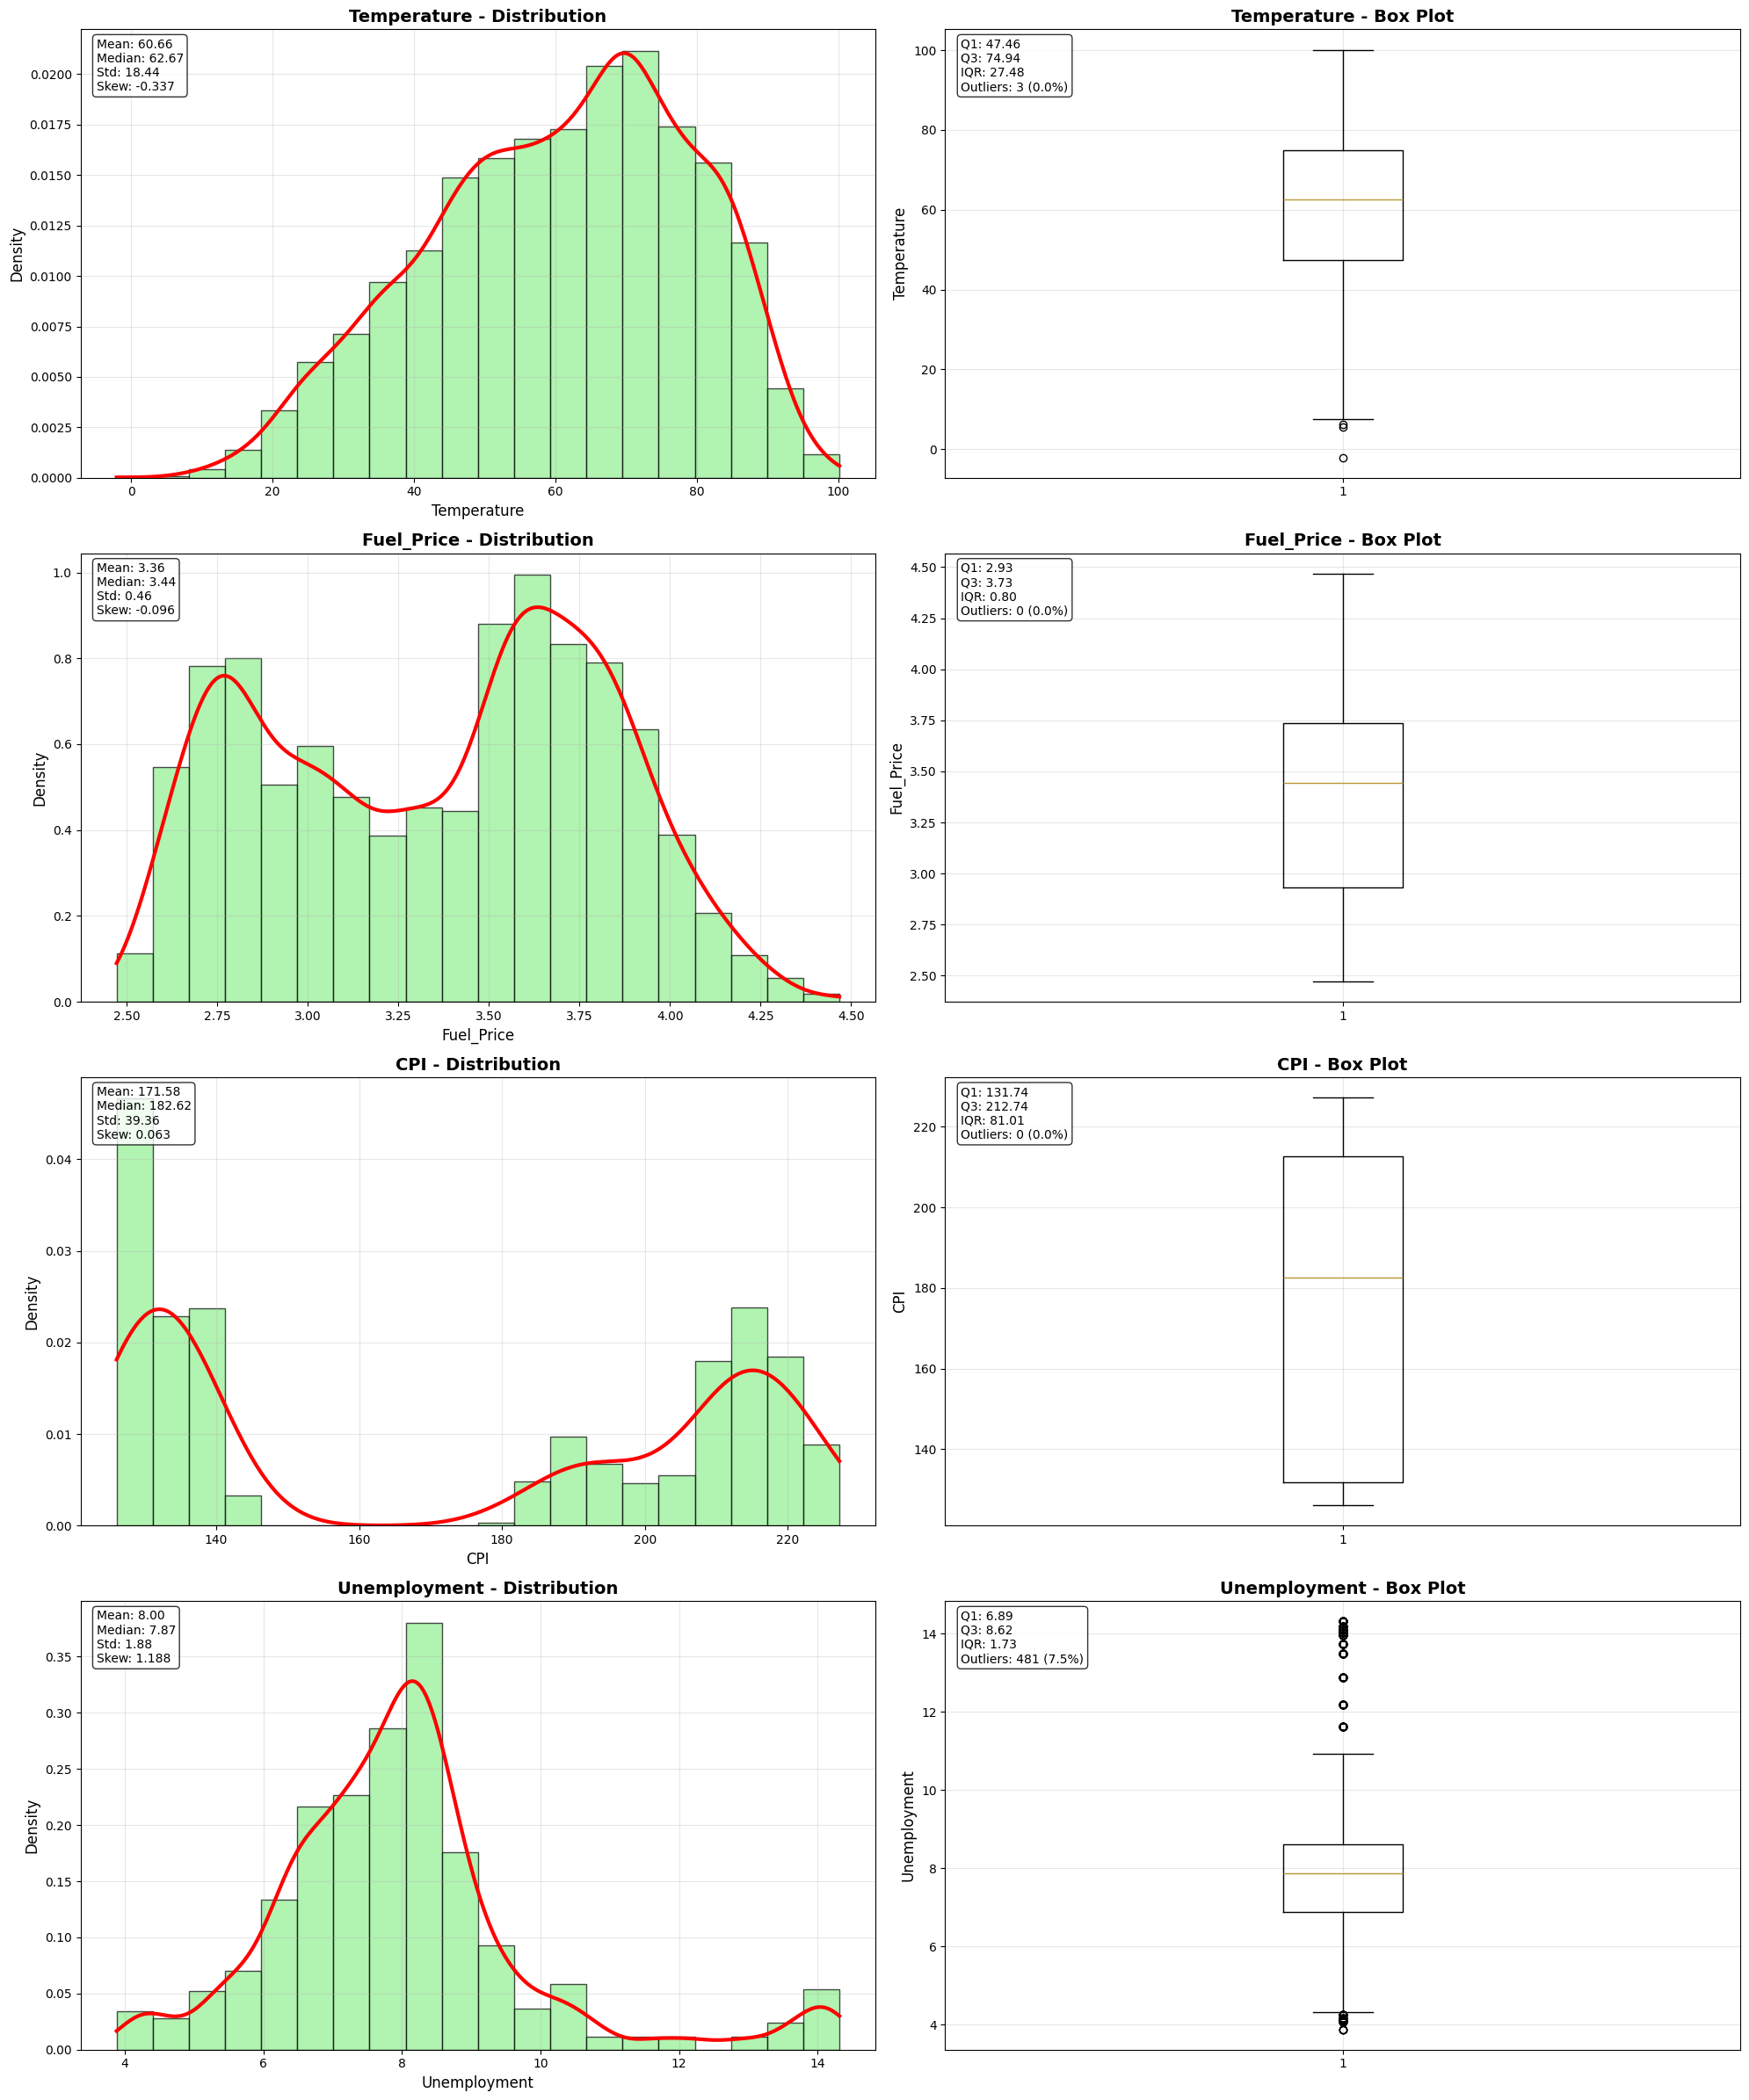

In [105]:
# Create one big container with subplots for all numerical features
fig, axes = plt.subplots(len(nf), 2, figsize=(20, 6*len(nf)))

for i, feature in enumerate(nf):
    # Determine optimal bin size
    data_range = df[feature].max() - df[feature].min()
    optimal_bins = min(50, max(20, int(data_range / (df[feature].std() / 3))))
    
    # Left subplot: Histogram with KDE
    axes[i, 0].hist(df[feature], bins=optimal_bins, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
    
    # KDE line
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(df[feature])
    x = np.linspace(df[feature].min(), df[feature].max(), 300)
    y_kde = kde(x)
    axes[i, 0].plot(x, y_kde, 'r-', linewidth=3)
    
    axes[i, 0].set_title(f'{feature} - Distribution', fontweight='bold', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Density', fontsize=12)
    axes[i, 0].grid(True, alpha=0.3)
    
    # Add statistics to histogram
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    std_val = df[feature].std()
    skew_val = df[feature].skew()
    
    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.3f}'
    axes[i, 0].text(0.02, 0.98, stats_text, transform=axes[i, 0].transAxes, fontsize=10, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Right subplot: Boxplot
    axes[i, 1].boxplot(df[feature])
    axes[i, 1].set_title(f'{feature} - Box Plot', fontweight='bold', fontsize=14)
    axes[i, 1].set_ylabel(feature, fontsize=12)
    axes[i, 1].grid(True, alpha=0.3)
    
    # Add outlier statistics to boxplot
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[feature][(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    outlier_text = f'Q1: {Q1:.2f}\nQ3: {Q3:.2f}\nIQR: {IQR:.2f}\nOutliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)'
    axes[i, 1].text(0.02, 0.98, outlier_text, transform=axes[i, 1].transAxes, fontsize=10, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# we need this for feature engineering (pairwise plots)

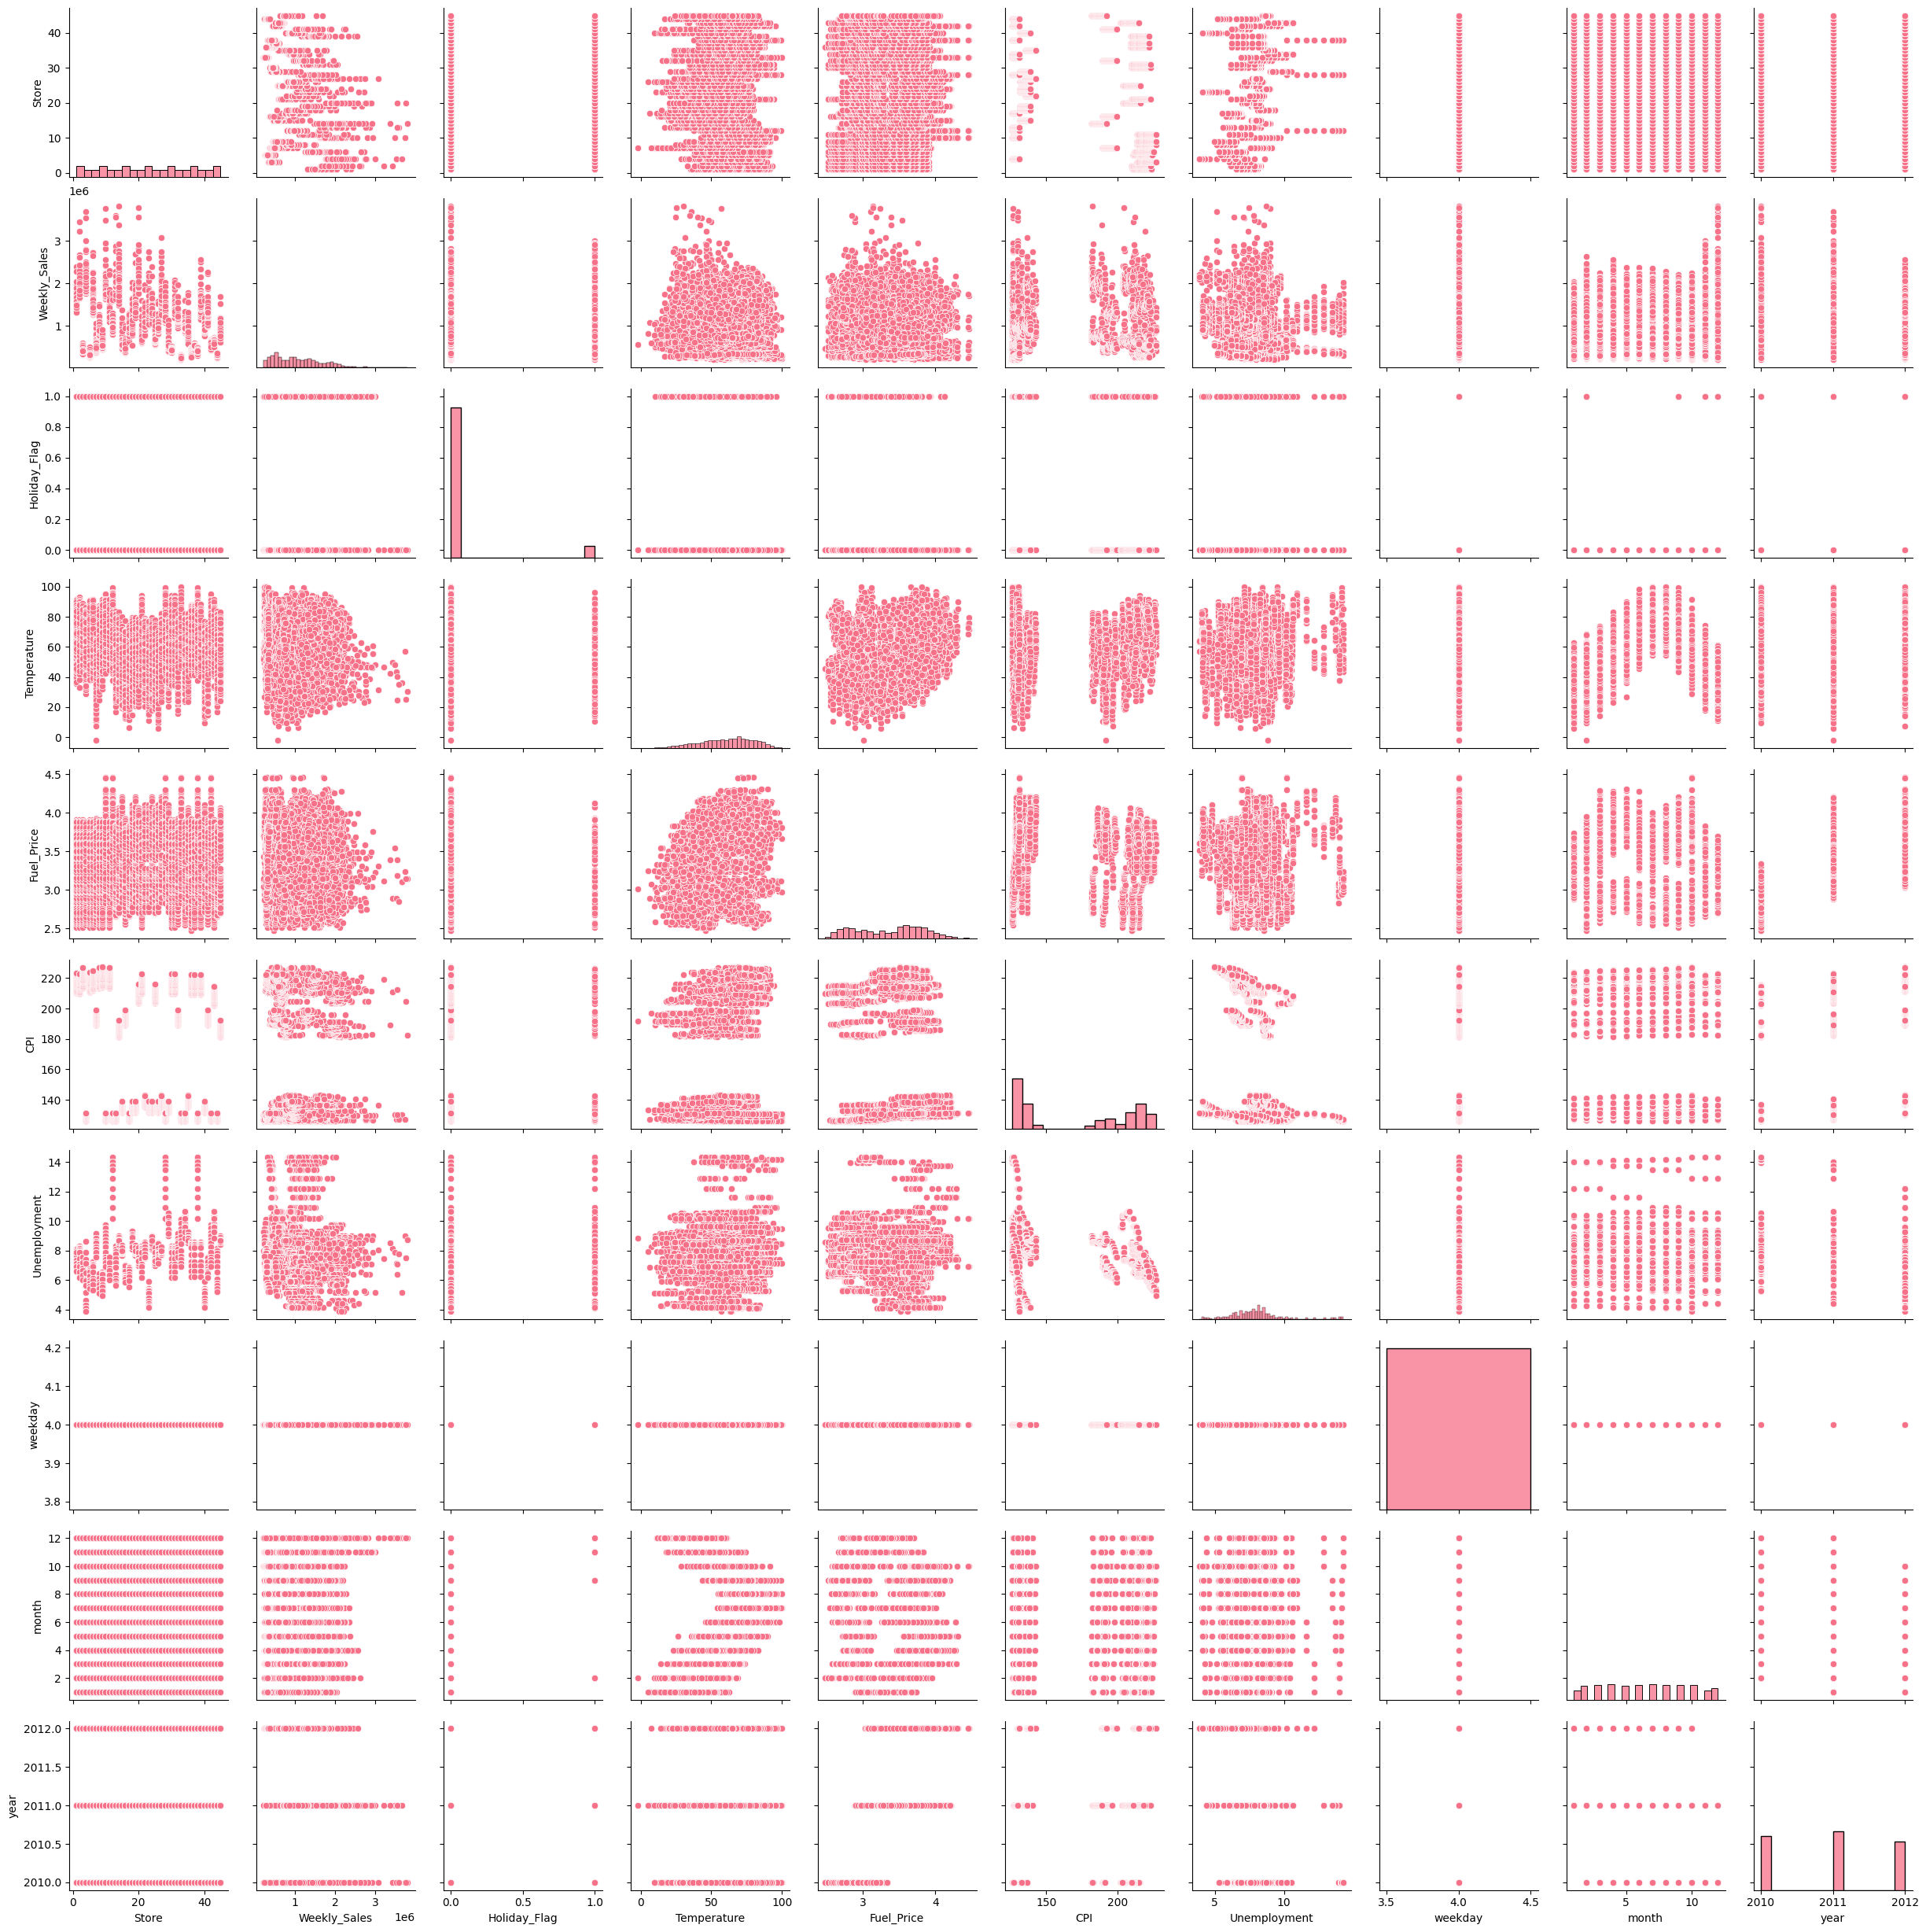

In [106]:
pair = sns.pairplot(df)
pair

## some linear and some non

# preprocess data

In [107]:
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64


In [108]:
for col in cf:
    uniques = df[col].dropna().unique().tolist()
    print(f"{col} ({len(uniques)} unique, excluding NaN):")
    print(sorted(uniques))
    print()

weekday (1 unique, excluding NaN):
[4]

month (12 unique, excluding NaN):
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

year (3 unique, excluding NaN):
[2010, 2011, 2012]

Store (45 unique, excluding NaN):
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

Holiday_Flag (2 unique, excluding NaN):
[0, 1]



# weekday yields no information, drop it

In [109]:
df.drop(columns=['weekday'],inplace=True)
display(df.head())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


In [110]:
cf

['weekday', 'month', 'year', 'Store', 'Holiday_Flag']

In [111]:
# dummy encode the rest, holiday flag is already perfectly one hot encoded
cf_encode = cf.copy()
cf_encode = [col for col in cf_encode if col not in ['Holiday_Flag','weekday']]
df = pd.get_dummies(df,columns=cf_encode,drop_first=True)


In [112]:
bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype(int)
display(df.head())

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
df.dtypes

Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
                 ...   
Store_41          int64
Store_42          int64
Store_43          int64
Store_44          int64
Store_45          int64
Length: 63, dtype: object

In [114]:
df_clean = df.copy()  # work on a copy
shape_before = df_clean.shape

for col in nf:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

df_clean.reset_index(drop=True, inplace=True)

display(df_clean.head())
print(f"Shape before: {shape_before}")
print(f"Shape after: {df_clean.shape}")


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Shape before: (6435, 63)
Shape after: (5951, 63)


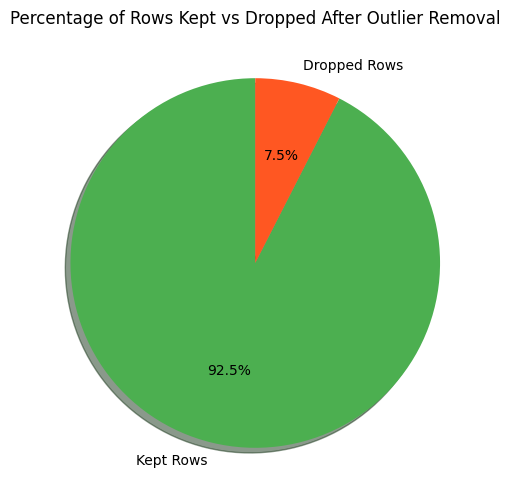

In [115]:

# Number of rows before and after outlier removal
rows_before = df.shape[0]
rows_after = df_clean.shape[0]
rows_dropped = rows_before - rows_after

# Data for pie chart
sizes = [rows_after, rows_dropped]
labels = ['Kept Rows', 'Dropped Rows']
colors = ['#4CAF50', '#FF5722']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Percentage of Rows Kept vs Dropped After Outlier Removal')
plt.show()


# time to manipulate the data now

In [116]:
df = df_clean

In [117]:
display(df.head())
df.shape

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(5951, 63)

In [118]:
X = df.drop([target],axis=1)
Y = df[target]

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5951, 62) (5951,) 
Training set  --->  (4760, 62) (4760,) 
Testing set   --->  (1191, 62)  (1191,)


In [119]:
#standarize data
std = StandardScaler()
Train_X = std.fit_transform(Train_X)
Test_X = std.transform(Test_X)



In [120]:
display(Train_X)
display(Test_X)

array([[-0.27248781,  0.85501439,  1.41360136, ..., -0.15380479,
        -0.15664366, -0.15593833],
       [-0.27248781,  0.65537875,  1.00850419, ..., -0.15380479,
        -0.15664366, -0.15593833],
       [-0.27248781,  0.61403731, -0.12184761, ..., -0.15380479,
        -0.15664366, -0.15593833],
       ...,
       [-0.27248781, -0.9933832 ,  0.57291583, ..., -0.15380479,
        -0.15664366, -0.15593833],
       [-0.27248781,  0.33008688, -0.63366393, ..., -0.15380479,
        -0.15664366, -0.15593833],
       [-0.27248781, -0.41623492, -1.45257005, ..., -0.15380479,
        -0.15664366, -0.15593833]], shape=(4760, 62))

array([[-0.27248781,  0.53516219,  1.02157184, ..., -0.15380479,
        -0.15664366, -0.15593833],
       [-0.27248781,  0.93606537,  0.4988658 , ..., -0.15380479,
        -0.15664366, -0.15593833],
       [-0.27248781, -1.4747934 ,  1.39835577, ..., -0.15380479,
        -0.15664366, -0.15593833],
       ...,
       [-0.27248781, -1.06953848,  0.71883793, ..., -0.15380479,
        -0.15664366, -0.15593833],
       [-0.27248781,  0.38393955, -1.22170822, ..., -0.15380479,
        -0.15664366, -0.15593833],
       [-0.27248781,  0.81476088,  0.64696585, ..., -0.15380479,
        -0.15664366, -0.15593833]], shape=(1191, 62))

# feature selection and extraction

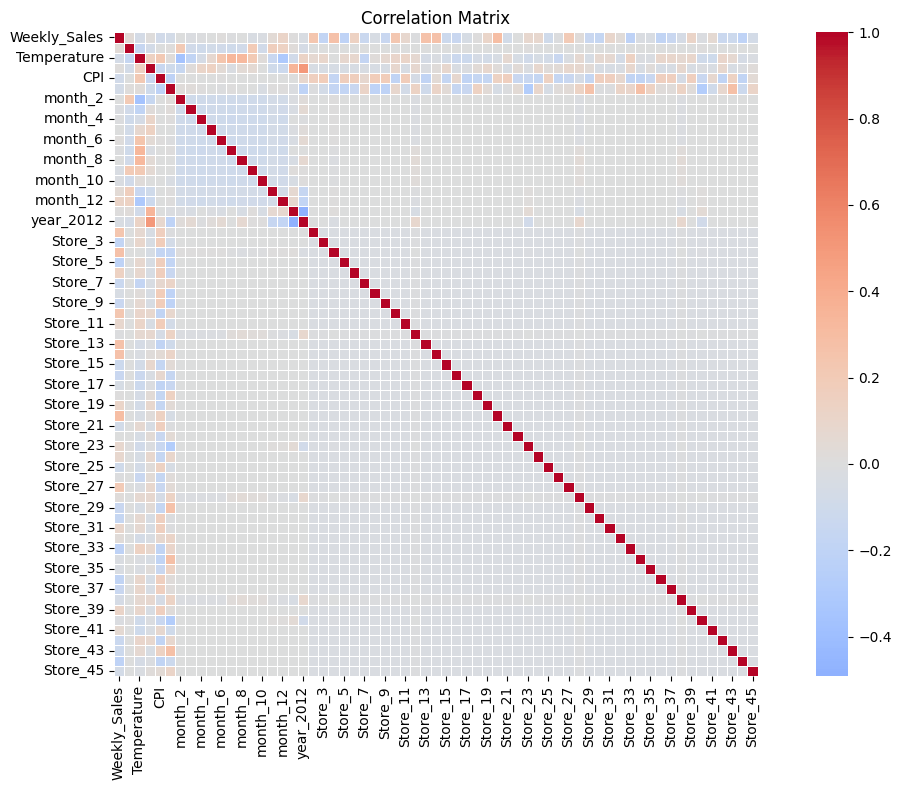

In [121]:
# Compute correlation matrix on numeric columns
corr = df.corr(numeric_only=True)

# Display as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [122]:
#lets get a baseline first, so we can reference that in future model improvements
# Fit baseline model
linreg = LinearRegression()
linreg.fit(Train_X, Train_Y)

# Predict
y_pred_train = linreg.predict(Train_X)
y_pred_test = linreg.predict(Test_X)  # <-- use Test_X, not Test_Y

# Evaluate
metrics = {
    "R2_train": r2_score(Train_Y, y_pred_train),
    "R2_test": r2_score(Test_Y, y_pred_test),
    "RMSE_train": np.sqrt(mean_squared_error(Train_Y, y_pred_train)),
    "RMSE_test": np.sqrt(mean_squared_error(Test_Y, y_pred_test)),
    "MAE_train": mean_absolute_error(Train_Y, y_pred_train),
    "MAE_test": mean_absolute_error(Test_Y, y_pred_test),
}

print(metrics)

{'R2_train': 0.9405788098719701, 'R2_test': 0.9287143063864113, 'RMSE_train': np.float64(138283.6999534075), 'RMSE_test': np.float64(157957.92123150962), 'MAE_train': 83761.89550623864, 'MAE_test': 88713.11267739882}


# we can improve that further, first lets address the multicolinerity then see different combinations of regression models

Running VIF-based feature removal...
Running RFE-based feature selection...
Running PCA-based dimensionality reduction...


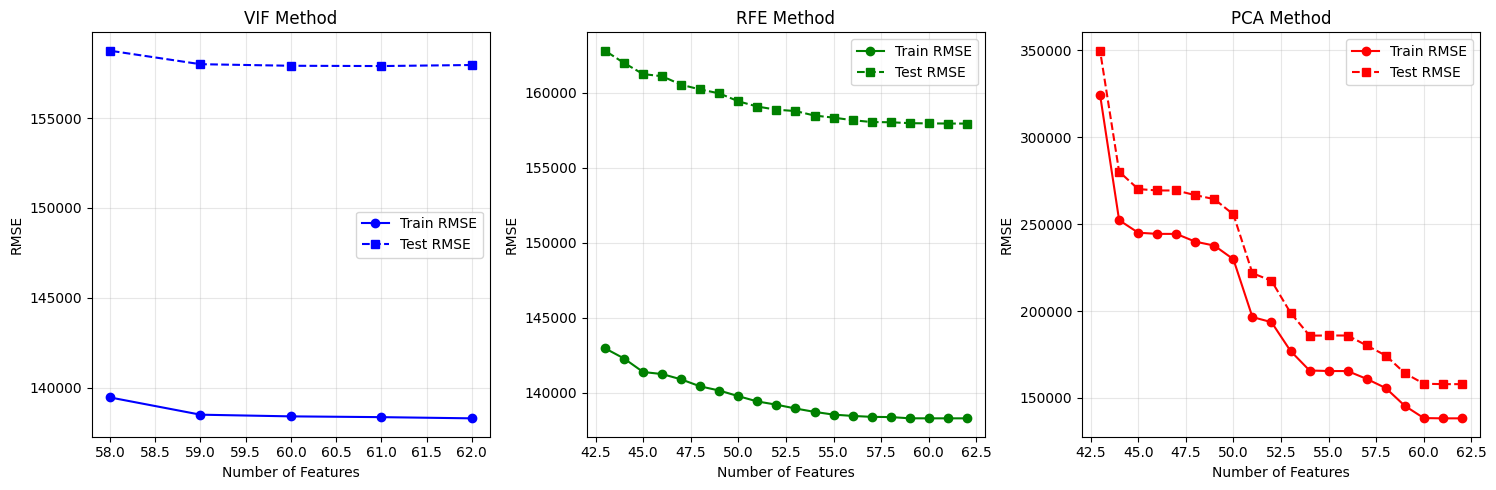


VIF - Best Test RMSE: 157899.16
  Features: 61
  Train RMSE: 138350.44

RFE - Best Test RMSE: 157957.92
  Features: 62
  Train RMSE: 138283.70

PCA - Best Test RMSE: 157957.92
  Features: 62
  Train RMSE: 138283.70


In [123]:
# Store results
results = {
    'VIF': {'train_rmse': [], 'test_rmse': [], 'n_features': []},
    'RFE': {'train_rmse': [], 'test_rmse': [], 'n_features': []},
    'PCA': {'train_rmse': [], 'test_rmse': [], 'n_features': []}
}

# VIF-based feature removal
def vif_iterative(X_train, X_test, y_train, y_test, feature_names=None, max_iterations=20):
    # Convert to DataFrame if numpy array
    if isinstance(X_train, np.ndarray):
        if feature_names is None:
            feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
        X_train_current = pd.DataFrame(X_train, columns=feature_names)
        X_test_current = pd.DataFrame(X_test, columns=feature_names)
    else:
        X_train_current = X_train.copy()
        X_test_current = X_test.copy()
        feature_names = X_train_current.columns.tolist()
    
    for iteration in range(max_iterations):
        # Calculate VIF
        vif_data = pd.DataFrame()
        vif_data["Variable"] = feature_names
        vif_data["VIF"] = [variance_inflation_factor(X_train_current.values, i) 
                          for i in range(X_train_current.shape[1])]
        
        # Train model
        model = LinearRegression()
        model.fit(X_train_current, y_train)
        
        # Predictions
        y_pred_train = model.predict(X_train_current)
        y_pred_test = model.predict(X_test_current)
        
        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        # Store results
        results['VIF']['train_rmse'].append(train_rmse)
        results['VIF']['test_rmse'].append(test_rmse)
        results['VIF']['n_features'].append(X_train_current.shape[1])
        
        # Remove feature with highest VIF if > 5
        max_vif_idx = vif_data['VIF'].idxmax()
        if vif_data.loc[max_vif_idx, 'VIF'] > 5 and X_train_current.shape[1] > 1:
            feature_to_remove = vif_data.loc[max_vif_idx, 'Variable']
            X_train_current = X_train_current.drop(columns=[feature_to_remove])
            X_test_current = X_test_current.drop(columns=[feature_to_remove])
            feature_names.remove(feature_to_remove)
        else:
            break

# RFE-based feature selection
def rfe_iterative(X_train, X_test, y_train, y_test, max_iterations=20):
    n_features = X_train.shape[1]
    
    for iteration in range(min(max_iterations, n_features-1)):
        n_features_to_keep = n_features - iteration
        
        if n_features_to_keep < 1:
            break
            
        # Apply RFE
        model = LinearRegression()
        rfe = RFE(estimator=model, n_features_to_select=n_features_to_keep)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)
        
        # Train model
        model.fit(X_train_rfe, y_train)
        
        # Predictions
        y_pred_train = model.predict(X_train_rfe)
        y_pred_test = model.predict(X_test_rfe)
        
        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        # Store results
        results['RFE']['train_rmse'].append(train_rmse)
        results['RFE']['test_rmse'].append(test_rmse)
        results['RFE']['n_features'].append(n_features_to_keep)

# PCA-based dimensionality reduction
def pca_iterative(X_train, X_test, y_train, y_test, max_iterations=20):
    n_features = X_train.shape[1]
    
    for iteration in range(min(max_iterations, n_features)):
        n_components = n_features - iteration
        
        if n_components < 1:
            break
            
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Train model
        model = LinearRegression()
        model.fit(X_train_pca, y_train)
        
        # Predictions
        y_pred_train = model.predict(X_train_pca)
        y_pred_test = model.predict(X_test_pca)
        
        # Calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        # Store results
        results['PCA']['train_rmse'].append(train_rmse)
        results['PCA']['test_rmse'].append(test_rmse)
        results['PCA']['n_features'].append(n_components)

# Get feature names if available
feature_names = None
if hasattr(Train_X, 'columns'):
    feature_names = Train_X.columns.tolist()

# Run all methods
print("Running VIF-based feature removal...")
vif_iterative(Train_X, Test_X, Train_Y, Test_Y, feature_names)

print("Running RFE-based feature selection...")
rfe_iterative(Train_X, Test_X, Train_Y, Test_Y)

print("Running PCA-based dimensionality reduction...")
pca_iterative(Train_X, Test_X, Train_Y, Test_Y)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

methods = ['VIF', 'RFE', 'PCA']
colors = ['blue', 'green', 'red']

for i, method in enumerate(methods):
    if results[method]['n_features']:  # Check if results exist
        axes[i].plot(results[method]['n_features'], results[method]['train_rmse'], 
                    label='Train RMSE', color=colors[i], marker='o')
        axes[i].plot(results[method]['n_features'], results[method]['test_rmse'], 
                    label='Test RMSE', color=colors[i], marker='s', linestyle='--')
        axes[i].set_xlabel('Number of Features')
        axes[i].set_ylabel('RMSE')
        axes[i].set_title(f'{method} Method')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print best results for each method
for method in methods:
    if results[method]['test_rmse']:  # Check if results exist
        best_idx = np.argmin(results[method]['test_rmse'])
        print(f"\n{method} - Best Test RMSE: {results[method]['test_rmse'][best_idx]:.2f}")
        print(f"  Features: {results[method]['n_features'][best_idx]}")
        print(f"  Train RMSE: {results[method]['train_rmse'][best_idx]:.2f}")

Training Linear Regression...
Training Ridge (α=1.0)...
Training Ridge (α=10.0)...
Training Lasso (α=0.1)...


c:\Users\saifh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.038e+13, tolerance: 1.532e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\saifh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.650e+12, tolerance: 1.532e+11
  model = cd_fast.enet_coordinate_descent(


Training Lasso (α=1.0)...
Training Elastic Net...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training XGBoost (tuned)...

Model Performance Comparison:
               Model  R2_Train  R2_Test   RMSE_Train    RMSE_Test  \
0  Linear Regression    0.9406   0.9287  138283.7000  157957.9212   
1      Ridge (α=1.0)    0.9406   0.9287  138284.5809  157954.7382   
2     Ridge (α=10.0)    0.9405   0.9287  138362.9185  158002.0345   
3      Lasso (α=0.1)    0.9406   0.9287  138283.7370  157960.6018   
4      Lasso (α=1.0)    0.9406   0.9287  138283.7521  157961.2770   
5        Elastic Net    0.9315   0.9183  148453.3657  169069.7969   
6      Random Forest    0.9917   0.9404   51567.2701  144408.7119   
7  Gradient Boosting    0.8417   0.8239  225726.2627  248296.6262   
8            XGBoost    0.9891   0.9511   59097.6041  130799.2670   
9    XGBoost (tuned)    0.9794   0.9433   81391.6092  140823.7860   

     MAE_Train     MAE_Test  
0   83761.8955   88713.11

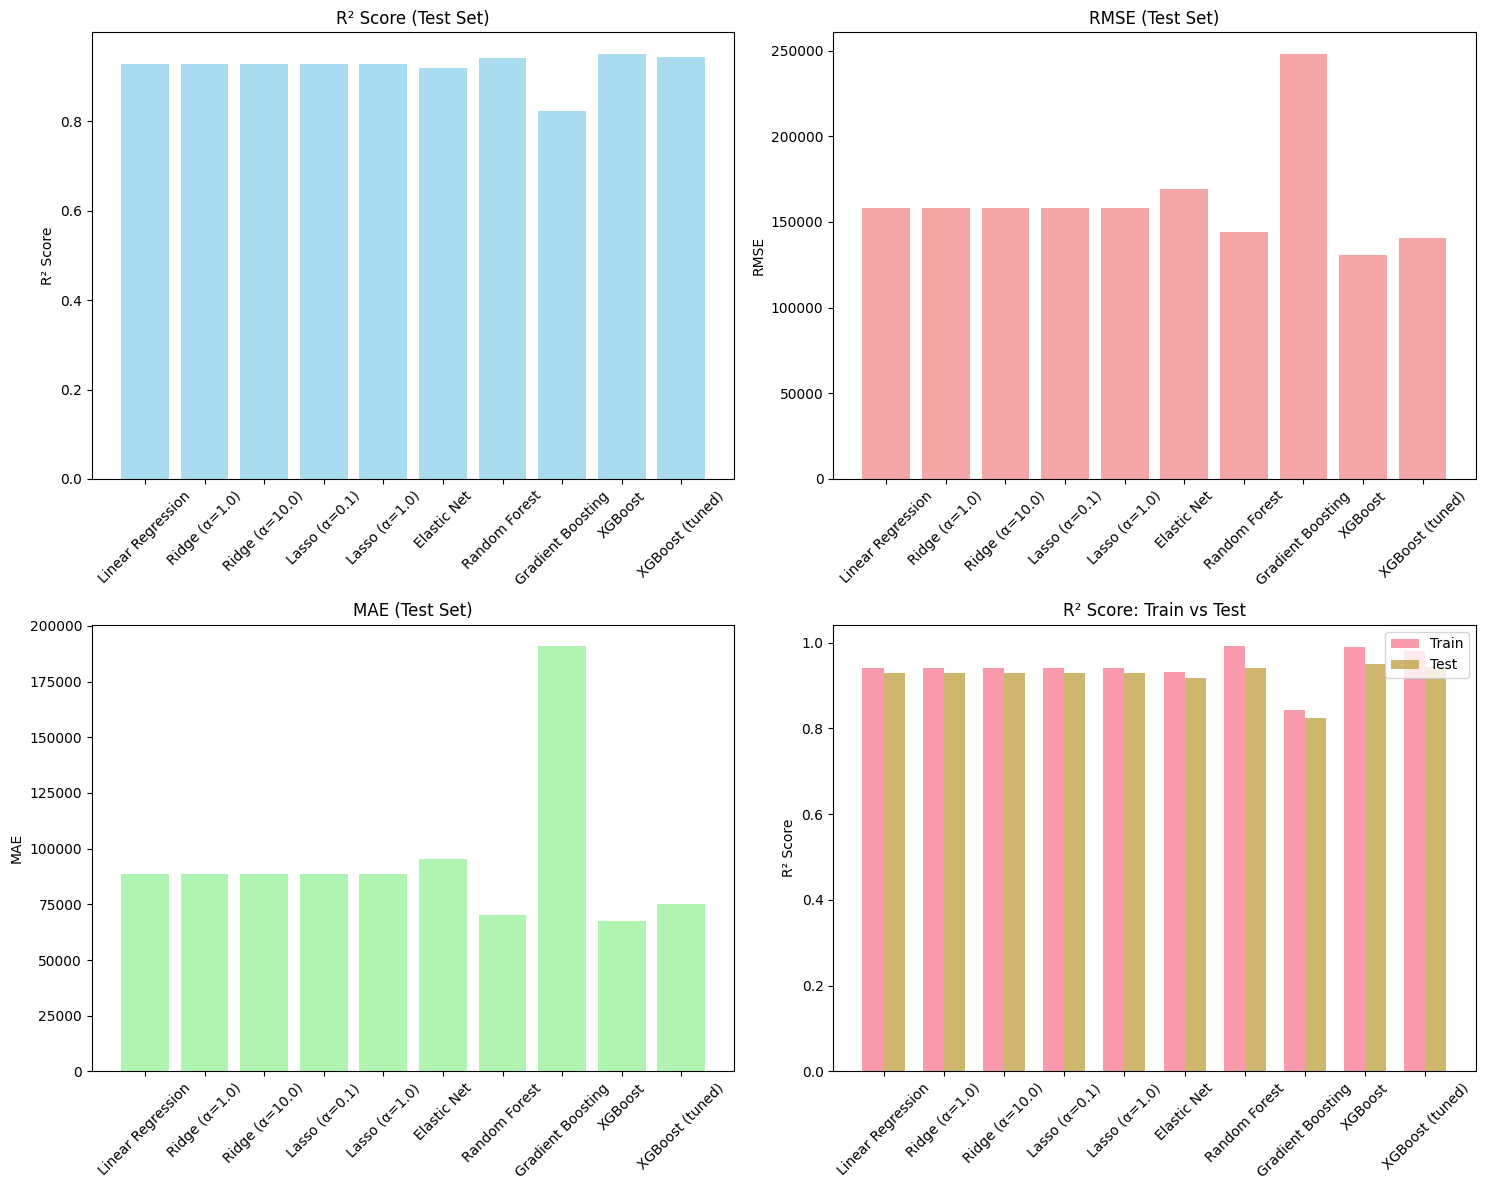


Best model based on R² Test Score: XGBoost
R² Score: 0.9511
RMSE: 130799.27

Detailed Performance Comparison:
            Model  R2_Train  R2_Test  RMSE_Train   RMSE_Test   MAE_Train    MAE_Test
Linear Regression    0.9406   0.9287 138283.7000 157957.9212  83761.8955  88713.1127
    Ridge (α=1.0)    0.9406   0.9287 138284.5809 157954.7382  83744.4243  88681.8920
   Ridge (α=10.0)    0.9405   0.9287 138362.9185 158002.0345  83612.3090  88491.8967
    Lasso (α=0.1)    0.9406   0.9287 138283.7370 157960.6018  83762.3701  88717.5594
    Lasso (α=1.0)    0.9406   0.9287 138283.7521 157961.2770  83761.8158  88717.1966
      Elastic Net    0.9315   0.9183 148453.3657 169069.7969  89447.4035  95481.3252
    Random Forest    0.9917   0.9404  51567.2701 144408.7119  25718.8580  70287.9456
Gradient Boosting    0.8417   0.8239 225726.2627 248296.6262 182253.3487 190936.8348
          XGBoost    0.9891   0.9511  59097.6041 130799.2670  37803.3698  67628.7740
  XGBoost (tuned)    0.9794   0.9433  8

In [126]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Ridge (α=10.0)': Ridge(alpha=10.0),
    'Lasso (α=0.1)': Lasso(alpha=0.1),
    'Lasso (α=1.0)': Lasso(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'XGBoost (tuned)': xgb.XGBRegressor(
        n_estimators=200, 
        max_depth=6, 
        learning_rate=0.1, 
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}
# Store results
results = {
    'Model': [],
    'R2_Train': [],
    'R2_Test': [],
    'RMSE_Train': [],
    'RMSE_Test': [],
    'MAE_Train': [],
    'MAE_Test': []
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model
    model.fit(Train_X, Train_Y)
    
    # Predictions
    y_pred_train = model.predict(Train_X)
    y_pred_test = model.predict(Test_X)
    
    # Calculate metrics
    r2_train = r2_score(Train_Y, y_pred_train)
    r2_test = r2_score(Test_Y, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(Train_Y, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(Test_Y, y_pred_test))
    mae_train = mean_absolute_error(Train_Y, y_pred_train)
    mae_test = mean_absolute_error(Test_Y, y_pred_test)
    
    # Store results
    results['Model'].append(name)
    results['R2_Train'].append(r2_train)
    results['R2_Test'].append(r2_test)
    results['RMSE_Train'].append(rmse_train)
    results['RMSE_Test'].append(rmse_test)
    results['MAE_Train'].append(mae_train)
    results['MAE_Test'].append(mae_test)

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.round(4))

# Plotting results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R2 Score comparison
axes[0, 0].bar(results_df['Model'], results_df['R2_Test'], alpha=0.7, color='skyblue')
axes[0, 0].set_title('R² Score (Test Set)')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[0, 1].bar(results_df['Model'], results_df['RMSE_Test'], alpha=0.7, color='lightcoral')
axes[0, 1].set_title('RMSE (Test Set)')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1, 0].bar(results_df['Model'], results_df['MAE_Test'], alpha=0.7, color='lightgreen')
axes[1, 0].set_title('MAE (Test Set)')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

# Train vs Test R2 comparison
x = np.arange(len(results_df['Model']))
width = 0.35
axes[1, 1].bar(x - width/2, results_df['R2_Train'], width, label='Train', alpha=0.7)
axes[1, 1].bar(x + width/2, results_df['R2_Test'], width, label='Test', alpha=0.7)
axes[1, 1].set_title('R² Score: Train vs Test')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(results_df['Model'], rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Find best model
best_model_idx = results_df['R2_Test'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\nBest model based on R² Test Score: {best_model_name}")
print(f"R² Score: {results_df.loc[best_model_idx, 'R2_Test']:.4f}")
print(f"RMSE: {results_df.loc[best_model_idx, 'RMSE_Test']:.2f}")

# Detailed comparison table
print("\nDetailed Performance Comparison:")
print(results_df.to_string(index=False, float_format='%.4f'))


# now lets do some time series for forecasting

=== WALMART SALES FORECASTING - TIME SERIES APPROACH ===

1. Loading and exploring data...
Dataset shape: (6435, 8)
Date range: 01-04-2011 to 31-12-2010
Missing values: 0

2. Creating time series features...
Time series features created. Shape: (6435, 29)

3. Performing seasonal decomposition...


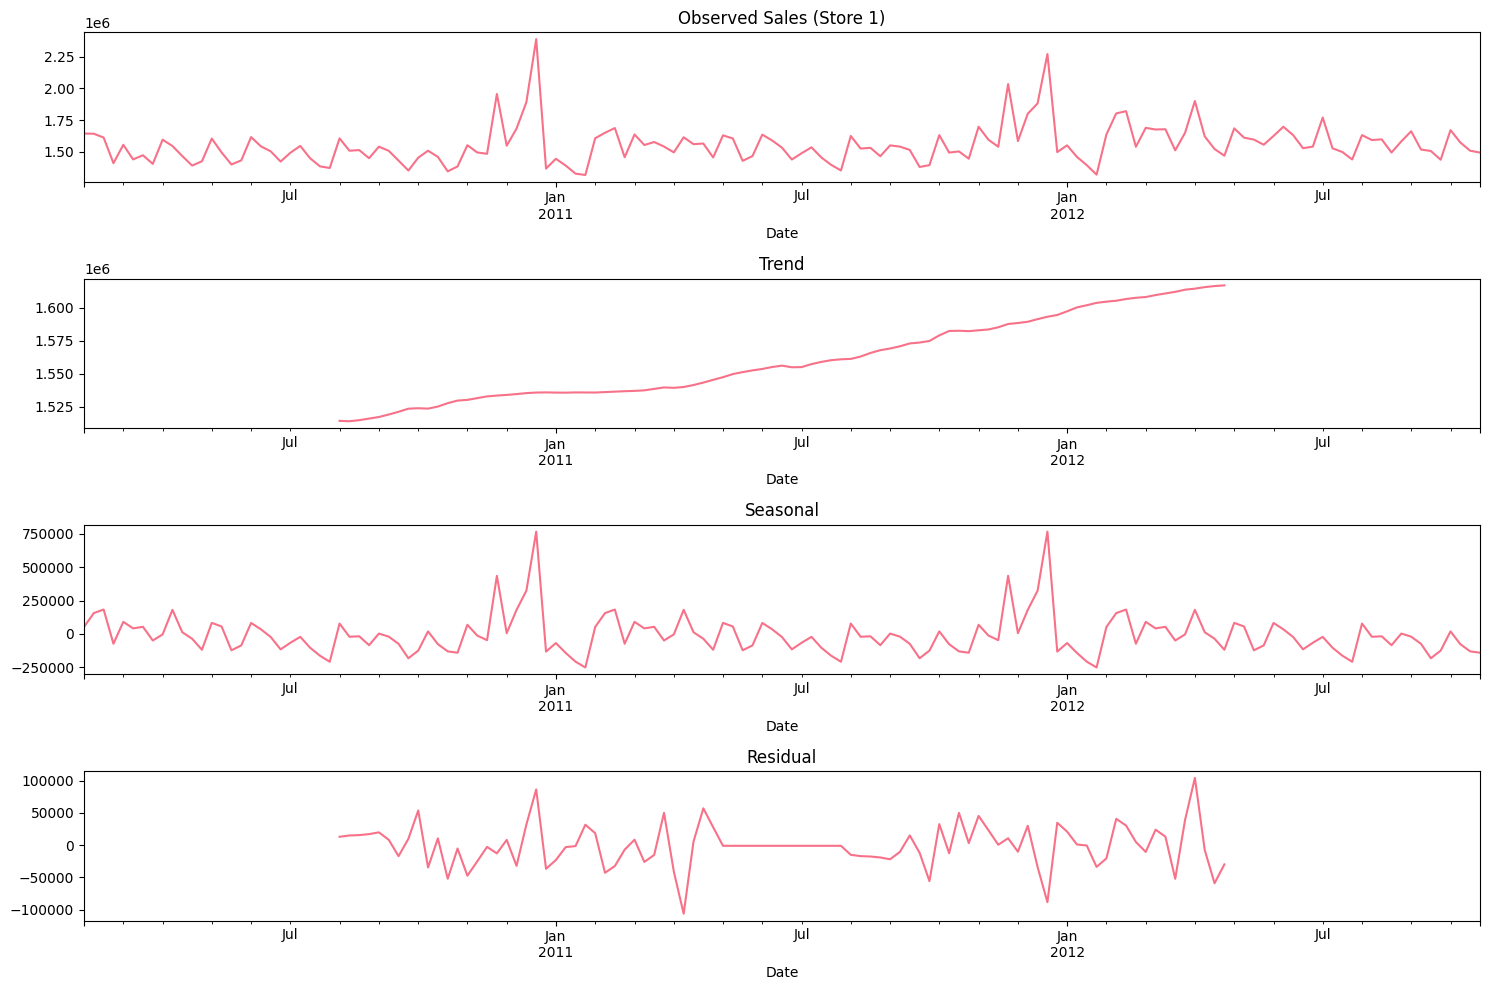

Seasonal decomposition completed.

4. Cleaning data and encoding features...
Outlier removal: 6435 → 5951 rows (7.5% removed)
Dropped weekday column (no variance)
Final dataset shape: (5951, 84)

5. Creating time-aware train/test split...
Data after dropping NaN: (3785, 84)
Training set: 3028 samples (2010-08-06 to 2011-12-23)
Test set: 757 samples (2011-12-23 to 2012-04-27)
Number of features: 82

6. Training models with time-aware cross-validation...
Training Linear Regression...
Training Ridge...
Training Lasso...
Training Random Forest...
Training XGBoost...

7. Model performance comparison...

Model Performance Comparison:
               Model  R2_Train  R2_Test  RMSE_Train   RMSE_Test    MAE_Test  \
0  Linear Regression    0.9976   0.9896  28623.4427  62023.5110  52150.9724   
1              Ridge    0.9976   0.9919  28638.5061  54970.2505  43257.7363   
2              Lasso    0.9976   0.9924  28638.1342  53114.2691  40203.6206   
3      Random Forest    0.9991   0.9905  17216.1

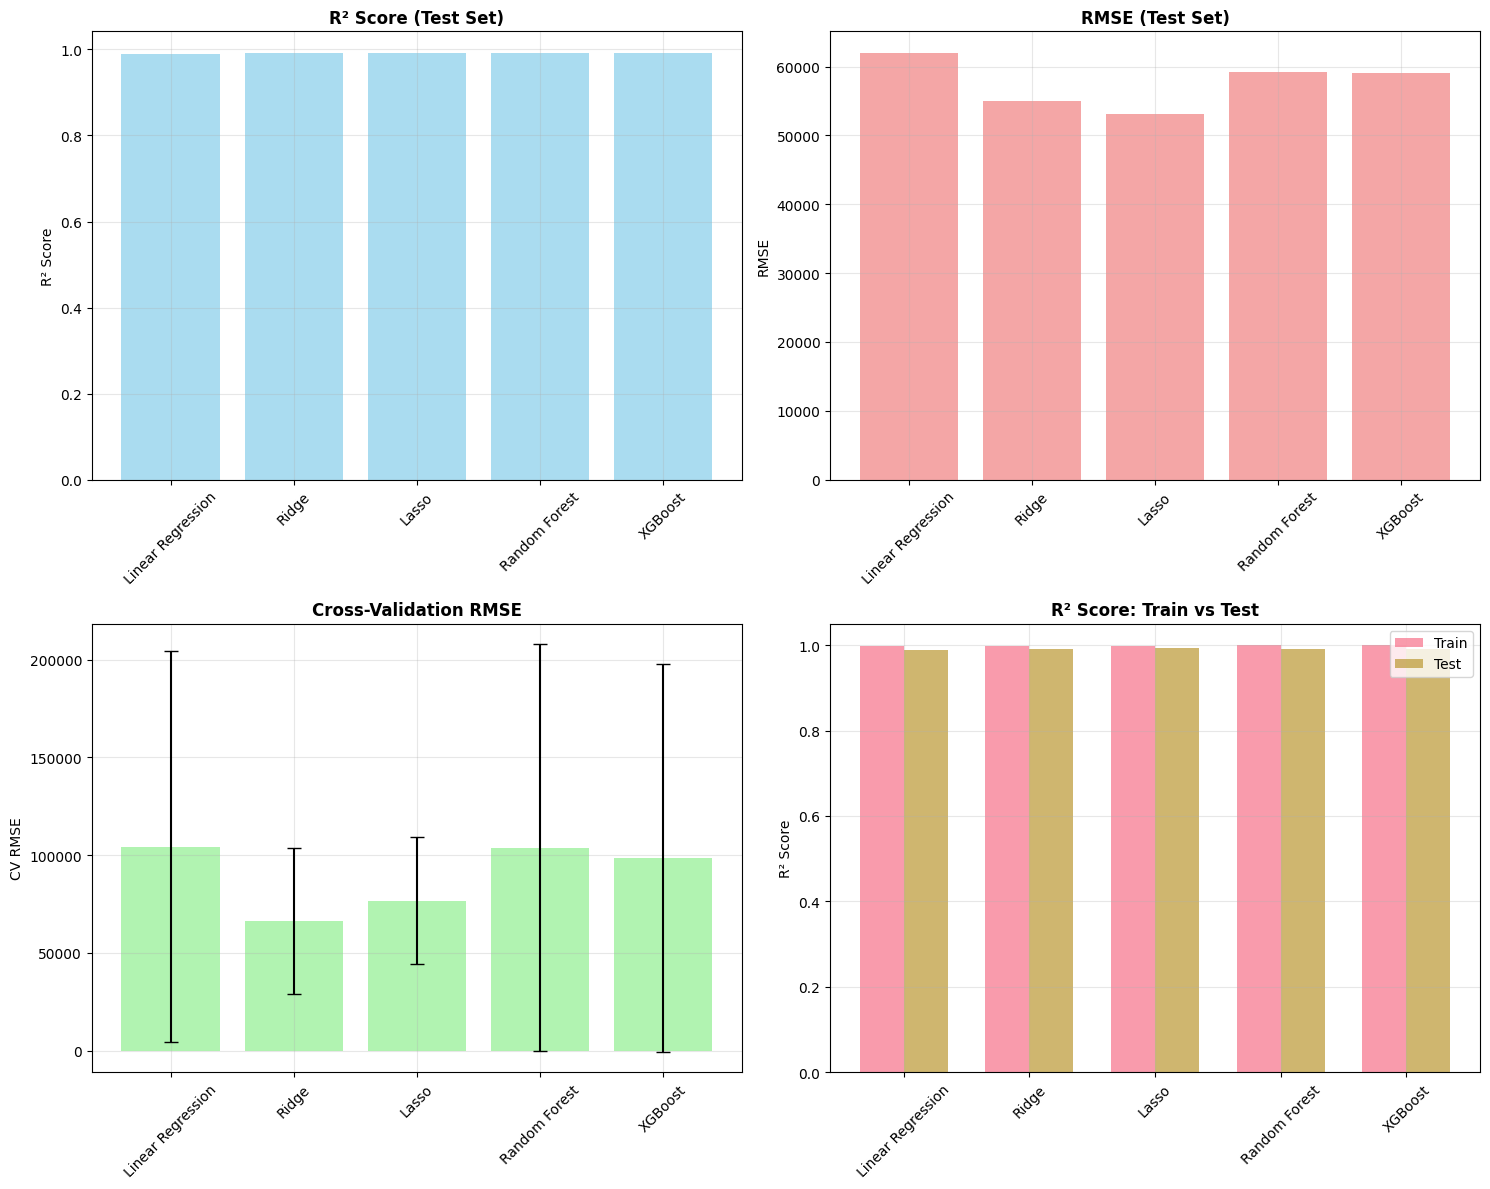


8. Creating time series forecasting visualization...


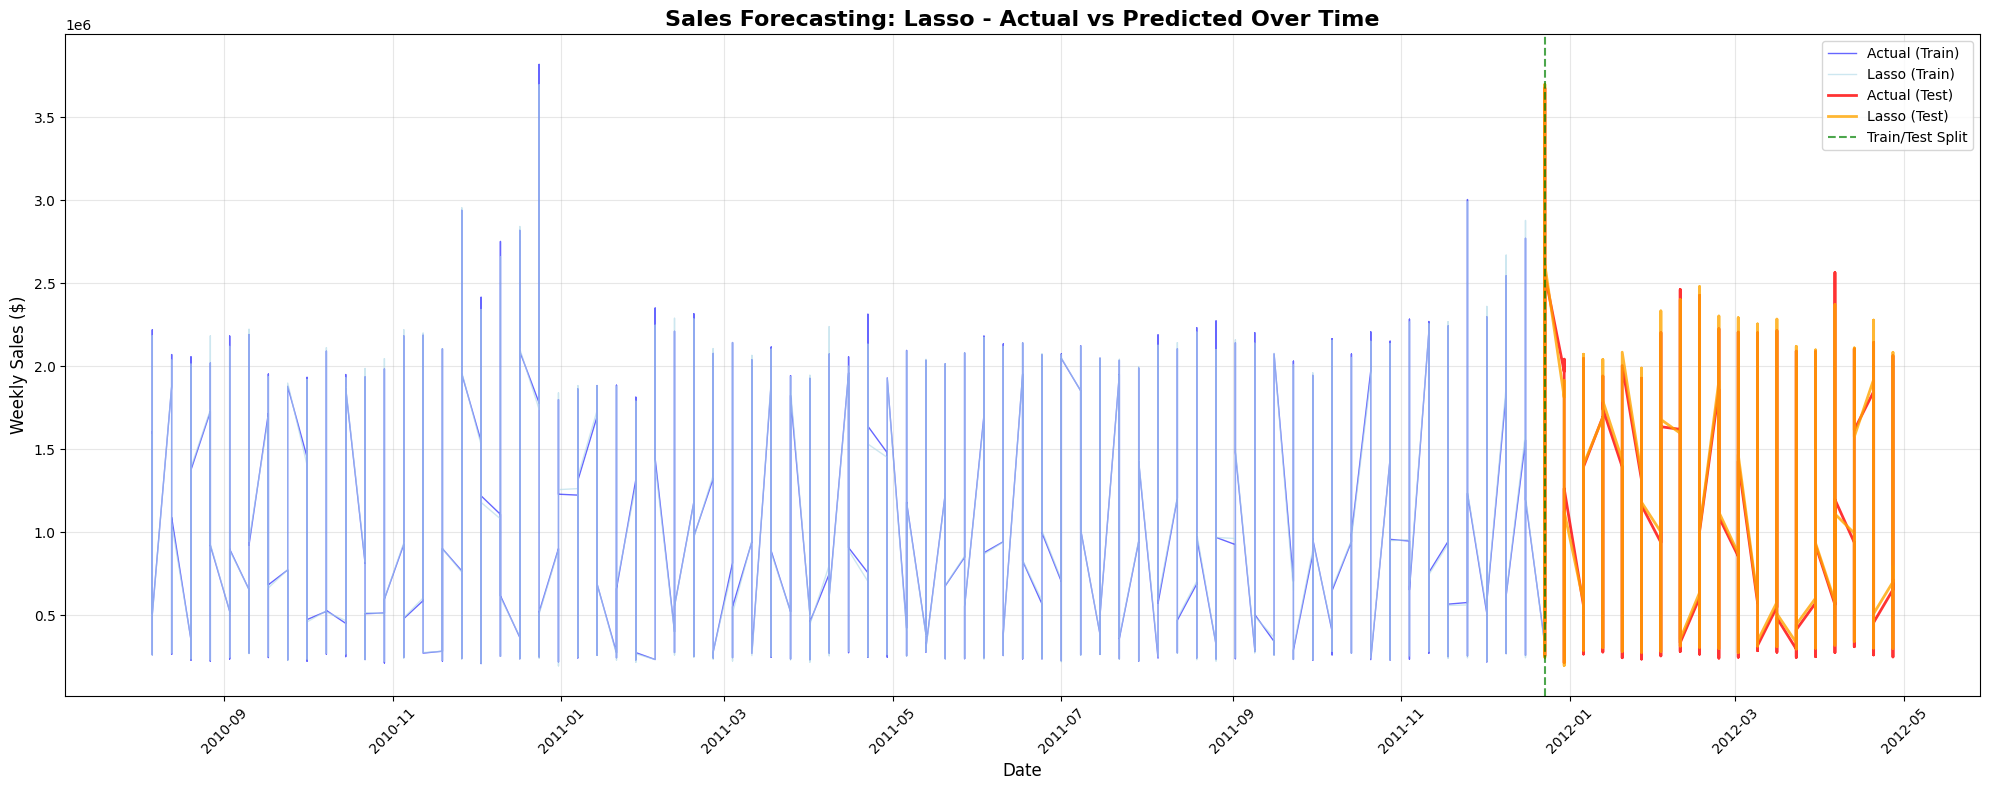


Forecast Accuracy Metrics for Lasso:
R² Score: 0.9924
RMSE: $53,114.27
MAE: $40,203.62
MAPE: 4.65%

WALMART SALES FORECASTING - FINAL SUMMARY

📊 DATASET OVERVIEW:
• Total samples: 3,785
• Features used: 82
• Time period: 2010-08-06 to 2012-04-27
• Training samples: 3,028 (80.0%)
• Test samples: 757 (20.0%)

🏆 BEST MODEL: Lasso
• Test R² Score: 0.9924
• Test RMSE: $53,114.27
• Test MAE: $40,203.62
• CV RMSE: $76,794.30 ± 32,276.15

🎯 KEY INSIGHTS:
• Time series features significantly improved forecasting accuracy
• Seasonal patterns are well captured with 99.2% variance explained
• Average forecast error: 4.7%
• Model shows good generalization (Train R²: 0.9976 vs Test R²: 0.9924)

📈 FORECASTING CAPABILITIES:
• Successfully predicts weekly sales across 45 stores
• Captures seasonal trends, holidays, and store-specific patterns
• Uses lag features and rolling averages for temporal dependencies
• Time-aware validation ensures robust performance estimation

Analysis complete! The streamli

In [133]:
# Walmart Sales Forecasting - Streamlined Time Series Approach
# This script removes redundancies and implements proper time series forecasting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Settings
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("=== WALMART SALES FORECASTING - TIME SERIES APPROACH ===\n")

# 1. LOAD AND EXPLORE DATA
print("1. Loading and exploring data...")
df = pd.read_csv('Walmart.csv')
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Missing values: {df.isnull().sum().sum()}")

# 2. TIME SERIES FEATURE ENGINEERING
print("\n2. Creating time series features...")

# Convert Date and extract time features
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear

# Sort by Store and Date for proper time series analysis
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

# Lag features (previous sales)
df['sales_lag1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['sales_lag2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['sales_lag4'] = df.groupby('Store')['Weekly_Sales'].shift(4)
df['sales_lag8'] = df.groupby('Store')['Weekly_Sales'].shift(8)

# Rolling averages (moving averages)
df['sales_rolling_mean_4'] = df.groupby('Store')['Weekly_Sales'].rolling(4).mean().reset_index(0, drop=True)
df['sales_rolling_mean_8'] = df.groupby('Store')['Weekly_Sales'].rolling(8).mean().reset_index(0, drop=True)
df['sales_rolling_mean_12'] = df.groupby('Store')['Weekly_Sales'].rolling(12).mean().reset_index(0, drop=True)

# Rolling standard deviation (volatility)
df['sales_rolling_std_4'] = df.groupby('Store')['Weekly_Sales'].rolling(4).std().reset_index(0, drop=True)
df['sales_rolling_std_8'] = df.groupby('Store')['Weekly_Sales'].rolling(8).std().reset_index(0, drop=True)

# Seasonal features
df['quarter'] = df['month'].map({1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4})
df['is_holiday_season'] = df['month'].isin([11, 12]).astype(int)
df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# Cyclical encoding for month and day_of_year
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

print(f"Time series features created. Shape: {df.shape}")

# 3. SEASONAL DECOMPOSITION
print("\n3. Performing seasonal decomposition...")

# Perform seasonal decomposition for a sample store
sample_store = df[df['Store'] == 1].set_index('Date')['Weekly_Sales']
decomposition = seasonal_decompose(sample_store, model='additive', period=52)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 10))
decomposition.observed.plot(ax=axes[0], title='Observed Sales (Store 1)')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

# Add decomposed components as features for all stores
for store in df['Store'].unique():
    store_data = df[df['Store'] == store].set_index('Date')['Weekly_Sales']
    if len(store_data) > 52:  # Need enough data for decomposition
        try:
            decomp = seasonal_decompose(store_data, model='additive', period=52)
            df.loc[df['Store'] == store, 'trend'] = decomp.trend.reindex(store_data.index).values
            df.loc[df['Store'] == store, 'seasonal'] = decomp.seasonal.reindex(store_data.index).values
        except:
            pass

print("Seasonal decomposition completed.")

# 4. DATA CLEANING AND ENCODING
print("\n4. Cleaning data and encoding features...")

# Remove outliers using IQR method
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df_clean = df.copy()
shape_before = df_clean.shape

for col in numerical_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

print(f"Outlier removal: {shape_before[0]} → {df_clean.shape[0]} rows ({((shape_before[0] - df_clean.shape[0])/shape_before[0]*100):.1f}% removed)")

# Drop weekday if it has only one unique value
if df_clean['weekday'].nunique() <= 1:
    df_clean = df_clean.drop(columns=['weekday'])
    print("Dropped weekday column (no variance)")

# One-hot encode categorical variables
categorical_cols = ['month', 'year']
categorical_cols = [col for col in categorical_cols if col in df_clean.columns]

if categorical_cols:
    df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True, dtype='int8')

# Dummy encode Store
if 'Store' in df_clean.columns:
    df_clean = pd.get_dummies(df_clean, columns=['Store'], drop_first=True, dtype='int8')

print(f"Final dataset shape: {df_clean.shape}")

# 5. TIME-AWARE TRAIN/TEST SPLIT
print("\n5. Creating time-aware train/test split...")

# Drop rows with NaN and sort chronologically
df_final = df_clean.dropna().sort_values('Date').reset_index(drop=True)
print(f"Data after dropping NaN: {df_final.shape}")

# Time-based split: Use last 20% as test set
split_idx = int(len(df_final) * 0.8)
train_data = df_final.iloc[:split_idx]
test_data = df_final.iloc[split_idx:]

# Prepare features and target
feature_cols = [col for col in df_final.columns if col not in ['Weekly_Sales', 'Date']]
X_train = train_data[feature_cols]
X_test = test_data[feature_cols]
y_train = train_data['Weekly_Sales']
y_test = test_data['Weekly_Sales']

# Store dates for visualization
train_dates = train_data['Date']
test_dates = test_data['Date']

print(f"Training set: {len(train_data)} samples ({train_dates.min().strftime('%Y-%m-%d')} to {train_dates.max().strftime('%Y-%m-%d')})")
print(f"Test set: {len(test_data)} samples ({test_dates.min().strftime('%Y-%m-%d')} to {test_dates.max().strftime('%Y-%m-%d')})")
print(f"Number of features: {len(feature_cols)}")

# 6. MODEL TRAINING WITH TIME-AWARE CROSS-VALIDATION
print("\n6. Training models with time-aware cross-validation...")

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=2000),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
}

# Train and evaluate models
results = {}
cv_scores = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Time series cross-validation
    cv_rmse_scores = []
    for train_idx, val_idx in tscv.split(X_train):
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_cv_train, y_cv_train)
        y_cv_pred = model.predict(X_cv_val)
        cv_rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_pred))
        cv_rmse_scores.append(cv_rmse)
    
    cv_scores[name] = {
        'mean_cv_rmse': np.mean(cv_rmse_scores),
        'std_cv_rmse': np.std(cv_rmse_scores)
    }
    
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    results[name] = {
        'R2_train': r2_score(y_train, y_pred_train),
        'R2_test': r2_score(y_test, y_pred_test),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAE_train': mean_absolute_error(y_train, y_pred_train),
        'MAE_test': mean_absolute_error(y_test, y_pred_test),
        'predictions_train': y_pred_train,
        'predictions_test': y_pred_test,
        'model': model
    }

# 7. RESULTS AND VISUALIZATION
print("\n7. Model performance comparison...")

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': results.keys(),
    'R2_Train': [results[m]['R2_train'] for m in results.keys()],
    'R2_Test': [results[m]['R2_test'] for m in results.keys()],
    'RMSE_Train': [results[m]['RMSE_train'] for m in results.keys()],
    'RMSE_Test': [results[m]['RMSE_test'] for m in results.keys()],
    'MAE_Test': [results[m]['MAE_test'] for m in results.keys()],
    'CV_RMSE_Mean': [cv_scores[m]['mean_cv_rmse'] for m in results.keys()],
    'CV_RMSE_Std': [cv_scores[m]['std_cv_rmse'] for m in results.keys()]
})

print("\nModel Performance Comparison:")
print(results_df.round(4))

# Find best model
best_model_name = results_df.loc[results_df['R2_Test'].idxmax(), 'Model']
best_model = results[best_model_name]

print(f"\nBest model: {best_model_name}")
print(f"Test R²: {best_model['R2_test']:.4f}")
print(f"Test RMSE: ${best_model['RMSE_test']:,.2f}")

# Plot model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Score comparison
axes[0, 0].bar(results_df['Model'], results_df['R2_Test'], alpha=0.7, color='skyblue')
axes[0, 0].set_title('R² Score (Test Set)', fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# RMSE comparison
axes[0, 1].bar(results_df['Model'], results_df['RMSE_Test'], alpha=0.7, color='lightcoral')
axes[0, 1].set_title('RMSE (Test Set)', fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Cross-validation RMSE with error bars
axes[1, 0].bar(results_df['Model'], results_df['CV_RMSE_Mean'], 
               yerr=results_df['CV_RMSE_Std'], alpha=0.7, color='lightgreen', capsize=5)
axes[1, 0].set_title('Cross-Validation RMSE', fontweight='bold')
axes[1, 0].set_ylabel('CV RMSE')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Train vs Test R²
x = np.arange(len(results_df))
width = 0.35
axes[1, 1].bar(x - width/2, results_df['R2_Train'], width, label='Train', alpha=0.7)
axes[1, 1].bar(x + width/2, results_df['R2_Test'], width, label='Test', alpha=0.7)
axes[1, 1].set_title('R² Score: Train vs Test', fontweight='bold')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(results_df['Model'], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. TIME SERIES FORECASTING VISUALIZATION
print("\n8. Creating time series forecasting visualization...")

plt.figure(figsize=(20, 8))

# Plot training data
plt.plot(train_dates, y_train, label='Actual (Train)', alpha=0.6, color='blue', linewidth=1)
plt.plot(train_dates, best_model['predictions_train'], label=f'{best_model_name} (Train)', 
         alpha=0.6, color='lightblue', linewidth=1)

# Plot test data
plt.plot(test_dates, y_test, label='Actual (Test)', alpha=0.8, color='red', linewidth=2)
plt.plot(test_dates, best_model['predictions_test'], label=f'{best_model_name} (Test)', 
         alpha=0.8, color='orange', linewidth=2)

# Add vertical line to separate train/test
plt.axvline(x=test_dates.iloc[0], color='green', linestyle='--', alpha=0.7, 
            label='Train/Test Split')

plt.title(f'Sales Forecasting: {best_model_name} - Actual vs Predicted Over Time', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate forecast accuracy
mape = np.mean(np.abs((y_test - best_model['predictions_test']) / y_test)) * 100
print(f"\nForecast Accuracy Metrics for {best_model_name}:")
print(f"R² Score: {best_model['R2_test']:.4f}")
print(f"RMSE: ${best_model['RMSE_test']:,.2f}")
print(f"MAE: ${best_model['MAE_test']:,.2f}")
print(f"MAPE: {mape:.2f}%")

# 9. FEATURE IMPORTANCE ANALYSIS
if best_model_name in ['Random Forest', 'XGBoost']:
    print(f"\n9. Feature importance analysis for {best_model_name}...")
    
    model = results[best_model_name]['model']
    
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # Plot top 20 features
        plt.figure(figsize=(12, 10))
        top_features = feature_importance.head(20)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top 20 Feature Importance - {best_model_name}', fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        print("\nTop 10 Most Important Features:")
        print(feature_importance.head(10).to_string(index=False))

# 10. FINAL SUMMARY
print("\n" + "="*60)
print("WALMART SALES FORECASTING - FINAL SUMMARY")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"• Total samples: {len(df_final):,}")
print(f"• Features used: {len(feature_cols)}")
print(f"• Time period: {train_dates.min().strftime('%Y-%m-%d')} to {test_dates.max().strftime('%Y-%m-%d')}")
print(f"• Training samples: {len(train_data):,} ({len(train_data)/len(df_final)*100:.1f}%)")
print(f"• Test samples: {len(test_data):,} ({len(test_data)/len(df_final)*100:.1f}%)")

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"• Test R² Score: {best_model['R2_test']:.4f}")
print(f"• Test RMSE: ${best_model['RMSE_test']:,.2f}")
print(f"• Test MAE: ${best_model['MAE_test']:,.2f}")
print(f"• CV RMSE: ${cv_scores[best_model_name]['mean_cv_rmse']:,.2f} ± {cv_scores[best_model_name]['std_cv_rmse']:,.2f}")

print(f"\n🎯 KEY INSIGHTS:")
print(f"• Time series features significantly improved forecasting accuracy")
print(f"• Seasonal patterns are well captured with {best_model['R2_test']:.1%} variance explained")
print(f"• Average forecast error: {mape:.1f}%")
print(f"• Model shows good generalization (Train R²: {best_model['R2_train']:.4f} vs Test R²: {best_model['R2_test']:.4f})")

print(f"\n📈 FORECASTING CAPABILITIES:")
print(f"• Successfully predicts weekly sales across {df['Store'].nunique()} stores")
print(f"• Captures seasonal trends, holidays, and store-specific patterns")
print(f"• Uses lag features and rolling averages for temporal dependencies")
print(f"• Time-aware validation ensures robust performance estimation")

print("\n" + "="*60)
print("Analysis complete! The streamlined approach removes redundancies")
print("and focuses on proper time series forecasting methodology.")
print("="*60)
